In [1]:
%load_ext autoreload
%autoreload 2

## Preliminaries

In [2]:
import funcy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

pd.options.display.max_columns = 99

In [3]:
from dengue_prediction.data.make_dataset import load_data
from dengue_prediction.features.build_features import build_features, build_target
from dengue_prediction.features.features import get_feature_transformations

## Explore the data

We are trying to predict the number of cases of dengue fever in San Juan, Puerto Rico, USA and Iquitos, Peru. The full problem description is available at https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/.

In [4]:
X_df, y_df = load_data()

In [5]:
X_df.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
city year weekofyear                                                         
sj   1990 18                              299.8                      295.9   
          19                              300.9                      296.4   
          20                              300.5                      297.3   
          21                              301.4                      297.0   
          22                              301.9                      297.5   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           2

In [6]:
X_df.shape

(1456, 21)

In [7]:
y_df.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

/usr/local/anaconda3/envs/dengue_prediction/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


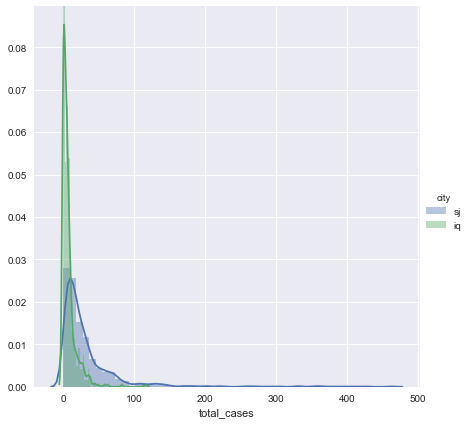

In [8]:
from dengue_prediction import PROJECT_ROOT
data = y_df.copy()
data = data.reset_index()[['city', 'total_cases']]
g = sns.FacetGrid(data=data, hue='city', size=6, aspect=1.0)
g = g.map(sns.distplot, 'total_cases')
g = g.add_legend()
plt.savefig(PROJECT_ROOT.joinpath('reports', 'figures', 'y.png'))

## Feature engineering

### What features have already been created?

In [9]:
X_df_tr, mapper_X = build_features(X_df)

/usr/local/anaconda3/envs/dengue_prediction/lib/python3.6/site-packages/sklearn_pandas-1.6.0-py3.6.egg/sklearn_pandas/pipeline.py:24: PerformanceWarning: indexing past lexsort depth may impact performance.
  return fit_method(X, y, **kwargs)
/usr/local/anaconda3/envs/dengue_prediction/lib/python3.6/site-packages/fhub_core-0.3.3-py3.6.egg/fhub_core/feature.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
  return func(convert(X), **kwargs)


In [10]:
X_df_tr

array([[ 1.86187825e+00,  5.40614117e-01,  3.27374273e+00, ...,
         4.44642117e-01,  3.41786611e-02,  3.03324573e+02],
       [ 1.16958091e+00,  4.74224382e-01,  4.12082420e+00, ...,
         6.17927284e-01,  1.24186726e+00,  3.03324573e+02],
       [ 2.07533379e-02, -8.86925081e-01,  4.03459456e+00, ...,
         3.27935343e-01,  3.77331117e-01,  3.03324573e+02],
       ...,
       [-8.72502810e-01, -7.28822914e-01,  2.88814706e+00, ...,
        -2.07411085e+00, -1.51911987e+00,  3.01200000e+02],
       [ 1.78685749e-02,  9.31718097e-02,  0.00000000e+00, ...,
        -9.38056669e-01, -1.51911987e+00,  3.01700000e+02],
       [-1.68614340e+00, -1.33522365e+00,  0.00000000e+00, ...,
        -1.21881401e+00, -1.16327426e+00,  3.02800000e+02]])

In [11]:
X_df_tr.shape

(1456, 46)

In [12]:
mapper_X

DataFrameMapper(default=False, df_out=False,
        features=[('ndvi_se', RobustTransformerPipeline(steps=[('lagimputer', LagImputer(groupby_kwargs={'level': 'city'})), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])), ('ndvi_sw',...one)), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0))]))],
        input_df=True, sparse=False)

In [13]:
y_df_tr, mapper_y = build_target(y_df)

### What do features look like?

In [14]:
features = get_feature_transformations()

In [15]:
features[0]

Feature(input='ndvi_se', transformer=RobustTransformerPipeline(steps=[('lagimputer', LagImputer(groupby_kwargs={'level': 'city'})), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), name=None, description=None, output=None, source=None, options={})

### Let's create a feature!

In [16]:
from fhub_core import Feature
from fhub_transformers.missing import LagImputer
from sklearn.preprocessing import Imputer, StandardScaler

In [17]:
input = 'ndvi_se'
transformer = [
    LagImputer(groupby_kwargs={'level': 'city'}),
    Imputer(),
    StandardScaler(),
]

In [18]:
X_df, y_df = load_data()
feature = Feature(input=input, transformer=transformer)
mapper = feature.as_dataframe_mapper()
mapper.fit(X_df, y_df)
mapper.transform(X_df)

array([[ 1.86187825],
       [ 1.16958091],
       [ 0.02075334],
       ...,
       [-0.87250281],
       [ 0.01786857],
       [-1.6861434 ]])

## Modeling, just for fun

In [19]:
from dengue_prediction.models.modeler import create_model

In [20]:
model = create_model()
model.fit(X_df_tr, y_df_tr)

In [21]:
model.score(X_df_tr, y_df_tr)

0.7201535418157748

In [22]:
model.predict(X_df_tr)

array([27.28377256, 26.66446263, 27.33911793, ..., 11.50973677,
       11.24686181, 12.44212455])